# Demand Prediction with Linear Regression Model

Walmart Inc. is an American multinational retail corporation that operates a chain of hypermarkets, discount department stores, and grocery stores in the United States, headquartered in Bentonville,

The objective of this project is to forecast the sales volume of a specific item, such as Kit-Kat chocolate, for the upcoming years of 2023-2024. To accomplish this task, we will utilize the Linear Regression Model, which is a statistical method used to establish a relationship between a dependent variable (in this case, sales volume) and one or more independent variables (times).

### Import Library & Data set

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
#Loading data :
train = pd.read_csv(r'walmart_data.csv', parse_dates=['date'])

train

,date,sales
0,2018-01-01,13
1,2018-01-02,11
2,2018-01-03,14
3,2018-01-04,13
4,2018-01-05,10
...,...,...
1821,2022-12-27,14
1822,2022-12-28,19
1823,2022-12-29,15
1824,2022-12-30,27


### Cleaning and Preparing Data

In [3]:
#date features :
train['dayofmonth'] = train.date.dt.day
train['dayofyear'] = train.date.dt.dayofyear
train['dayofweek'] = train.date.dt.dayofweek
train['month'] = train.date.dt.month
train['year'] = train.date.dt.year
train['weekofyear'] = train.date.dt.weekofyear
train.head()

C:\Users\fadak\AppData\Local\Temp/ipykernel_4772/1469107328.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  train['weekofyear'] = train.date.dt.weekofyear


,date,sales,dayofmonth,dayofyear,dayofweek,month,year,weekofyear
0,2018-01-01,13,1,1,0,1,2018,1
1,2018-01-02,11,2,2,1,1,2018,1
2,2018-01-03,14,3,3,2,1,2018,1
3,2018-01-04,13,4,4,3,1,2018,1
4,2018-01-05,10,5,5,4,1,2018,1


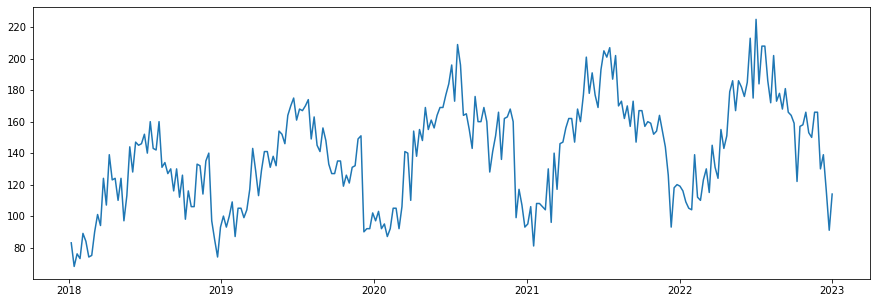

In [4]:
plt.figure(figsize=(15,5))
month_df = train.resample('W',on='date').sum()
x= np.array(month_df.index)
y=np.array(month_df.sales)
plt.plot(x,y)

In [5]:
# dummies features : 
df = pd.get_dummies(train, columns = ['dayofmonth','dayofweek','month','weekofyear'])
df = df.drop(['weekofyear_53'], axis=1)
df.head()

,date,sales,dayofyear,year,dayofmonth_1,dayofmonth_2,dayofmonth_3,dayofmonth_4,dayofmonth_5,dayofmonth_6,...,weekofyear_43,weekofyear_44,weekofyear_45,weekofyear_46,weekofyear_47,weekofyear_48,weekofyear_49,weekofyear_50,weekofyear_51,weekofyear_52
0,2018-01-01,13,1,2018,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2018-01-02,11,2,2018,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2018-01-03,14,3,2018,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2018-01-04,13,4,2018,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2018-01-05,10,5,2018,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Create train and test Data

In [6]:
#train and validation dataframe :
msk = np.random.rand(len(df)) < 0.8
df_train = df[msk]
df_val = df[~msk]
print("train shape: ",df_train.shape)
print("validation shape :",df_val.shape)

train shape:  (1441, 106)
validation shape : (385, 106)


In [7]:
y_train = df_train['sales'].values
y_test = df_val['sales'].values
X_train = df_train.drop(['sales', 'date'], axis=1).values
X_test = df_val.drop(['sales', 'date'], axis=1).values

### Modelling

In [9]:
# Create a linear regression object
model = LinearRegression()

# Fit the model to the data
model.fit(X_train, y_train)

# Make predictions for the test data
y_pred = model.predict(X_test)

### Validation

In [12]:
# Calculate RMSE for the predictions
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the RMSE
print('RMSE:', rmse)

RMSE: 4.788066278976083


### Plotting the Model

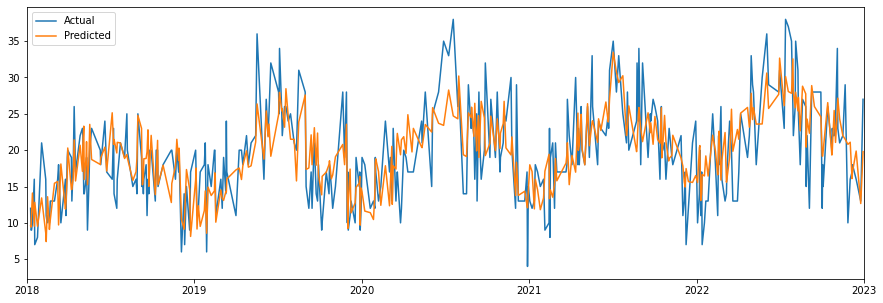

In [13]:
plt.figure(figsize=(15,5))
plt.plot(df_val.date, y_test, label='Actual')
plt.plot(df_val.date, y_pred, label='Predicted')

# Set x and y limits to zoom in on the year 2018
start_date = pd.to_datetime('2018-01-01')
end_date = pd.to_datetime('2023-01-01')
plt.xlim(start_date, end_date)
plt.legend(loc='best')

plt.show()

### Predicting for 2023 - 2024

In [14]:
start_date = '2023-01-01'
end_date = '2024-01-01'

# Create a DataFrame with one column containing all dates between start_date and end_date
df_dates = pd.DataFrame({'date': pd.date_range(start=start_date, end=end_date, freq='D')})

#date features :
df_dates['dayofmonth'] = df_dates.date.dt.day
df_dates['dayofyear'] = df_dates.date.dt.dayofyear
df_dates['dayofweek'] = df_dates.date.dt.dayofweek
df_dates['month'] = df_dates.date.dt.month
df_dates['year'] = df_dates.date.dt.year
df_dates['weekofyear'] = df_dates.date.dt.weekofyear

# dummies features : 
new_df = pd.get_dummies(df_dates, columns = ['dayofmonth','dayofweek','month','weekofyear'])
new_df.head()

C:\Users\fadak\AppData\Local\Temp/ipykernel_4772/184265833.py:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_dates['weekofyear'] = df_dates.date.dt.weekofyear


,date,dayofyear,year,dayofmonth_1,dayofmonth_2,dayofmonth_3,dayofmonth_4,dayofmonth_5,dayofmonth_6,dayofmonth_7,...,weekofyear_43,weekofyear_44,weekofyear_45,weekofyear_46,weekofyear_47,weekofyear_48,weekofyear_49,weekofyear_50,weekofyear_51,weekofyear_52
0,2023-01-01,1,2023,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2023-01-02,2,2023,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2023-01-03,3,2023,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2023-01-04,4,2023,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2023-01-05,5,2023,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
X_2023 = new_df.drop(['date'], axis=1).values
y_2023 = model.predict(X_2023)

### Plotting the prediction for future

As you can see, the number of sales for each day of 2023-2024 is predicted and plotted.

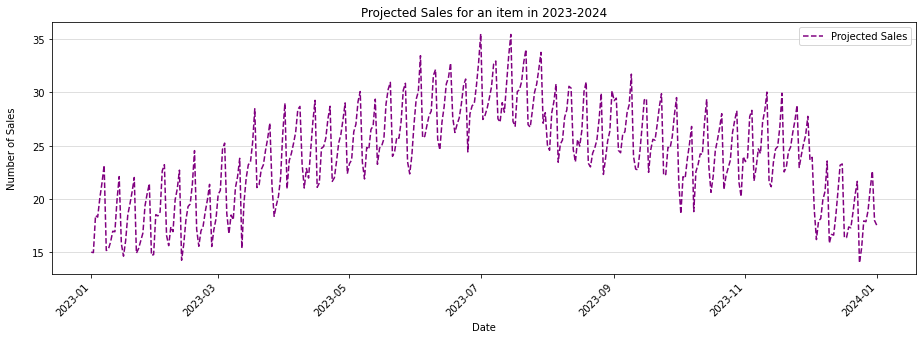

In [24]:
plt.figure(figsize=(15,5))
plt.plot(df_dates.date.values, y_2023, color='purple', linestyle='--', label='Projected Sales')
plt.title('Projected Sales for an item in 2023-2024')
plt.xlabel('Date')
plt.ylabel('Number of Sales', labelpad=15)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.5)
plt.legend()
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)
plt.show()